In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

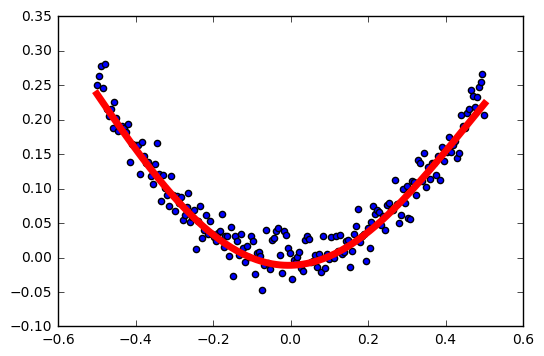

In [3]:
#生成200个随机点
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]
#噪音
noise = np.random.normal(0,0.02,x_data.shape)
#y数据
y_data = np.square(x_data) + noise

#定义两个placeholder
x = tf.placeholder(tf.float32,[None,1])  #行不确定，1列
y = tf.placeholder(tf.float32,[None,1])

#定义神经网络中间层
Weights_L1 = tf.Variable(tf.random_normal([1,10]))  #1个输入，10个输出
biases_l1 = tf.Variable(tf.zeros([1,10]))
Wx_plus_b_L1 = tf.matmul(x,Weights_L1)+biases_l1
L1 = tf.nn.tanh(Wx_plus_b_L1)  #激活函数，得到中间层的输出

#定义输出层
Weights_L2 = tf.Variable(tf.random_normal([10,1]))
biases_L2 = tf.Variable(tf.zeros([1,1]))
Wx_plus_b_L2 = tf.matmul(L1,Weights_L2) + biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

#定义代价函数
loss = tf.reduce_mean(tf.square(y-prediction))

#使用梯度下降法优化
train_step = tf.train.GradientDescentOptimizer(0.2).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(2000):
        sess.run(train_step,feed_dict = {x:x_data,y:y_data})
        
    #获得预测值
    prediction_value = sess.run(prediction,feed_dict = {x:x_data})
    
    #定义画布
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,'r-',lw =5)
    plt.show()